# Метод Рунге-Кутты

Чтобы протестировать метод Рунге-Кутты, возьмём какую-нибудь функцию, например, $x^2$, запишем для неё дифференциальное уравнение и задачу Коши и численное решение этой задачи Коши с истинными значениями.

$$(x^2)' = 2 x$$

$$y' = \frac{2y}{x}$$

Импортируем инструменты

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dsolvemethods import CauchyProblem, RungeKutta, VectorFunction

Создаём задачу Коши, инициализируем солвер

In [2]:
f = VectorFunction([lambda x, y: 2 * y[0] / x])
problem = CauchyProblem(f, 1.0, np.array([1.0]))
rk = RungeKutta(h=0.05)

Получаем численное решение уравнения

In [3]:
args, values = rk.solve(problem, 1.0)
print(args, values, sep='\n')

[1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]
[[1.        ]
 [1.10168692]
 [1.20829423]
 [1.31982191]
 [1.43626997]
 [1.55763841]
 [1.68392722]
 [1.81513639]
 [1.95126593]
 [2.09231584]
 [2.23828611]
 [2.38917674]
 [2.54498773]
 [2.70571909]
 [2.8713708 ]
 [3.04194287]
 [3.2174353 ]
 [3.39784809]
 [3.58318124]
 [3.77343474]
 [3.9686086 ]]


Получаем истинные значения функции

In [4]:
x = np.linspace(1, 2, len(args))
y = x**2

Выводим график

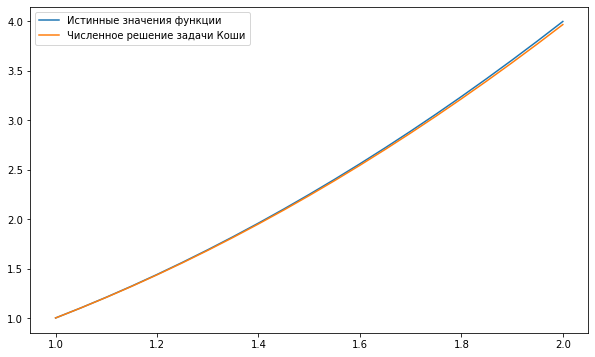

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Истинные значения функции')
plt.plot(args, values.flatten(), label='Численное решение задачи Коши')
plt.legend()
plt.show()

Второй более сложный пример с синусом. 

$$sin''(x) = cos'(x) = - sin(x)$$

$$y''(x) = - y(x)$$

Приводим к виду $y' = f(x, y)$:
Полагая $y_0(x) = sin(x), y_1(x) = cos(x)$,

$$y_0'(x) = y_1(x)$$
$$y_1'(x) = - y_0(x)$$
$$y_0(0) = 0$$
$$y_1(0) = 1$$

Составляем задачу Коши, инициализируем солвер

In [6]:
f = VectorFunction([lambda x, y: y[1], lambda x, y: -y[0]])
problem = CauchyProblem(f, 0.0, np.array([0.0, 1.0]))
rk = RungeKutta(h=0.025)

Решаем

In [7]:
args, values = rk.solve(problem, np.pi)

Выводим график

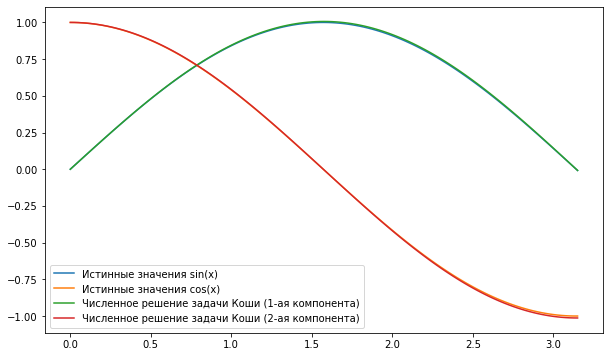

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(args, np.sin(args), label='Истинные значения sin(x)')
plt.plot(args, np.cos(args), label='Истинные значения cos(x)')
plt.plot(args, values[:, 0], label='Численное решение задачи Коши (1-ая компонента)')
plt.plot(args, values[:, 1], label='Численное решение задачи Коши (2-ая компонента)')
plt.legend()
plt.show()

Думаю, результат вполне адекватный. 